In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [5]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Split the dataset into training and testing datasets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Transformation

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Use Naive Bayes algorithm

In [15]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)


GaussianNB()

## Predicting Values

In [21]:
y_pred=gaussian.predict(X_test)

In [22]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Evaluting Modal

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro' )
recall = recall_score(y_test, y_pred, average='micro')

print("\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (micro-average): {precision:.4f}")
print(f"Recall (micro-average): {recall:.4f}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Model Performance on Test Set:
Accuracy: 0.9778
Precision (micro-average): 0.9778
Recall (micro-average): 0.9778

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


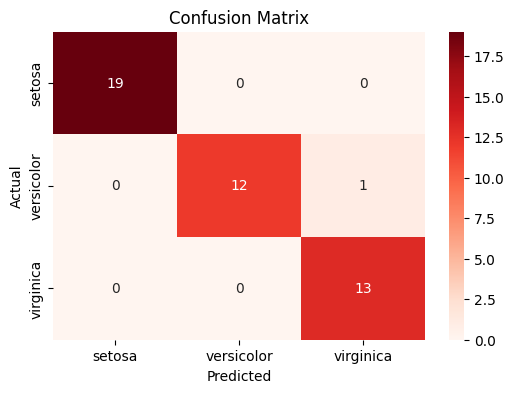

In [30]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

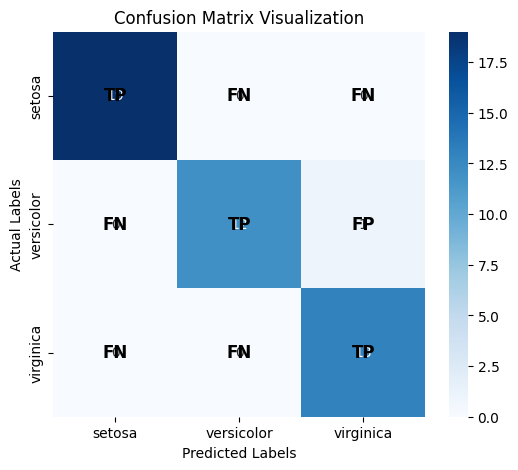

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Visualization')


for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j + 0.5, i + 0.5, f"TP" if i == j else "FP" if cm[i, j] > 0 and i != j else "FN", 
                 ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.show()